# K-Nearest Neighbors

by Yesman Choque Mamani (<a href="https://github.com/yesmanic/Machine_Learning_Models">view on GitHub</a>)

This notebook demonstrates the application of the K-Nearest Neighbors (KNN) algorithm for data prediction, utilizing the scikit-learn library. It provides a step-by-step guide on how to train a KNN model, make predictions, and evaluate the model's performance.

## Algorithm

The K-Nearest Neighbors (KNN) algorithm is a type of instance-based learning method used for both classification and regression tasks. Here's a simplified explanation of how it works:

1. __Set K:__ Choose the number of neighbors to consider. This is the 'K' in KNN.

2. __Calculate Distances:__ For a given target point, calculate the distance (usually Euclidean) to all other points in the dataset.

$$ d(x, y) = || x - y ||_2 = \sqrt{\sum^N_{i = 0} (x_i - y_i)^2}$$

3. __Find Nearest Neighbors:__ Identify the 'K' points in the dataset that are closest to the target point.

4. __Vote (for classification) or Average (for regression):__

    - For classification, each of the 'K' points gets a vote on the class, and the class with the most votes is the predicted class.
    - For regression, the average of the 'K' points' values is the predicted value.

Remember, KNN is a lazy learning algorithm, meaning it doesn't build a model using the training set until a query of the data is performed. It's worth noting that choosing the right 'K' is crucial for the algorithm's performance. Too small a 'K' can lead to overfitting, while too large a 'K' can lead to underfitting.

## Initial Setup

The initial setup involves importing some useful libraries for creating and manipulating data.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

## Classification

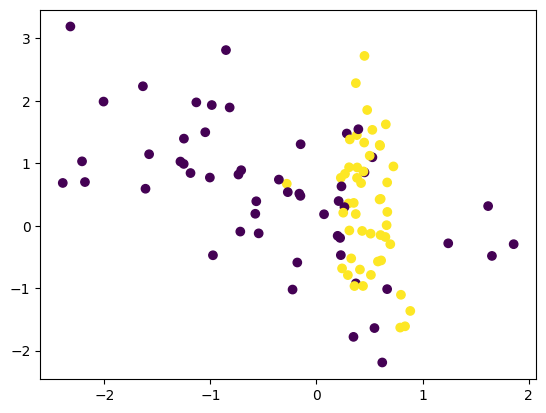

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_redundant=0, n_informative=2, n_repeated=0,
                           n_clusters_per_class=1, random_state=0,
                           class_sep=0.5, flip_y=0.1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y);

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
score = knn_classifier.score(X_test, y_test)
print(f"Test score: {score:.2f}")

Test score: 0.80


Now we plot the decision boundary of the classification assinging a color to each area.

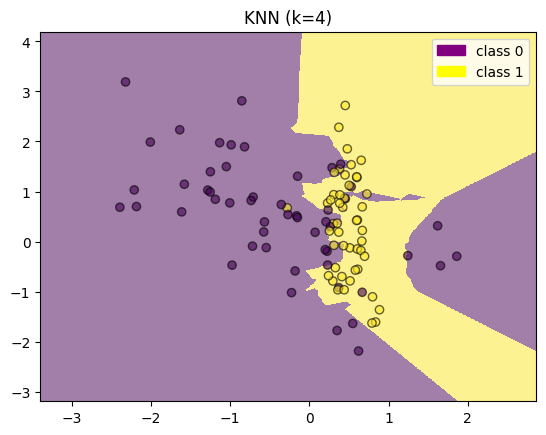

In [5]:
mesh_step_size = 0.01

x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1

feature0_meshgrid, feature1_meshgrid = np.meshgrid(np.arange(x0_min, x0_max, mesh_step_size),
                                                   np.arange(x1_min, x1_max, mesh_step_size))

Z = knn_classifier.predict(np.c_[feature0_meshgrid.ravel(), feature1_meshgrid.ravel()])
Z = Z.reshape(feature0_meshgrid.shape)

plt.figure()
plt.pcolormesh(feature0_meshgrid, feature1_meshgrid, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k', alpha=0.6)
plt.title('KNN (k=4)')

patch0 = mpatches.Patch(color='purple', label='class 0')
patch1 = mpatches.Patch(color='yellow', label='class 1')

plt.legend(handles=[patch0, patch1])
plt.show()
